<a href="https://colab.research.google.com/github/MoazzemhossainMoazz/EDGE_AI/blob/main/EDGE_classwork_17_7_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
#training data
X_train = np.array([[1.2], [2.4], [3.1], [4.6], [5.3]])
Y_train = np.array([0, 0, 0, 1, 1])

In [3]:
#create an instance of the logistic regression model
logreg = LogisticRegression()

In [4]:
#fit the logistic regression model to the training data
logreg.fit(X_train, Y_train)

LogisticRegression()

In [5]:
#fit the logistic regression model to the training data
logreg.fit(X_train, Y_train)

LogisticRegression()

In [9]:
#test data
X_test = np.array([[1.8], [3.5], [4.2]])
Y_test = np.array([0, 1, 1])

In [10]:
#make predictions on the test data
Y_pred = logreg.predict(X_test)

In [11]:
#calculate training and testing accuracy score
training_accuracy = logreg.score(X_train, Y_train)
testing_accuracy = accuracy_score(Y_test, Y_pred)

In [12]:
#predict a new value
X_new = np.array([[3.9]])
Y_new = logreg.predict(X_new)

In [13]:
 #print the scores and evaluation metrics
 print("Traingin accuracy:", training_accuracy)
 print("Testing accuracy:", testing_accuracy)

 print("Predicted class labels for test data:", Y_pred)
 print("Predicted class label for a new value(3.9):", Y_new)

Traingin accuracy: 1.0
Testing accuracy: 0.6666666666666666
Predicted class labels for test data: [0 0 1]
Predicted class label for a new value(3.9): [0]


In [14]:
#calculate classification report
classification_rep = classification_report(Y_test, Y_pred)

print(classification_rep)

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



In [15]:
#Relevant Libraries Import
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
#import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score , recall_score, precision_score, f1_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, train_test_split

In [16]:
#dataset import
df = pd.read_csv("/content/Dataset of Diabetes .csv")

In [17]:
#data preprocession start
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [18]:
df.describe()

,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,340.500000,2.705514e+05,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020
std,240.397673,3.380758e+06,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388
min,1.000000,1.230000e+02,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,125.750000,2.406375e+04,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,300.500000,3.439550e+04,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,550.250000,4.538425e+04,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,800.000000,7.543566e+07,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


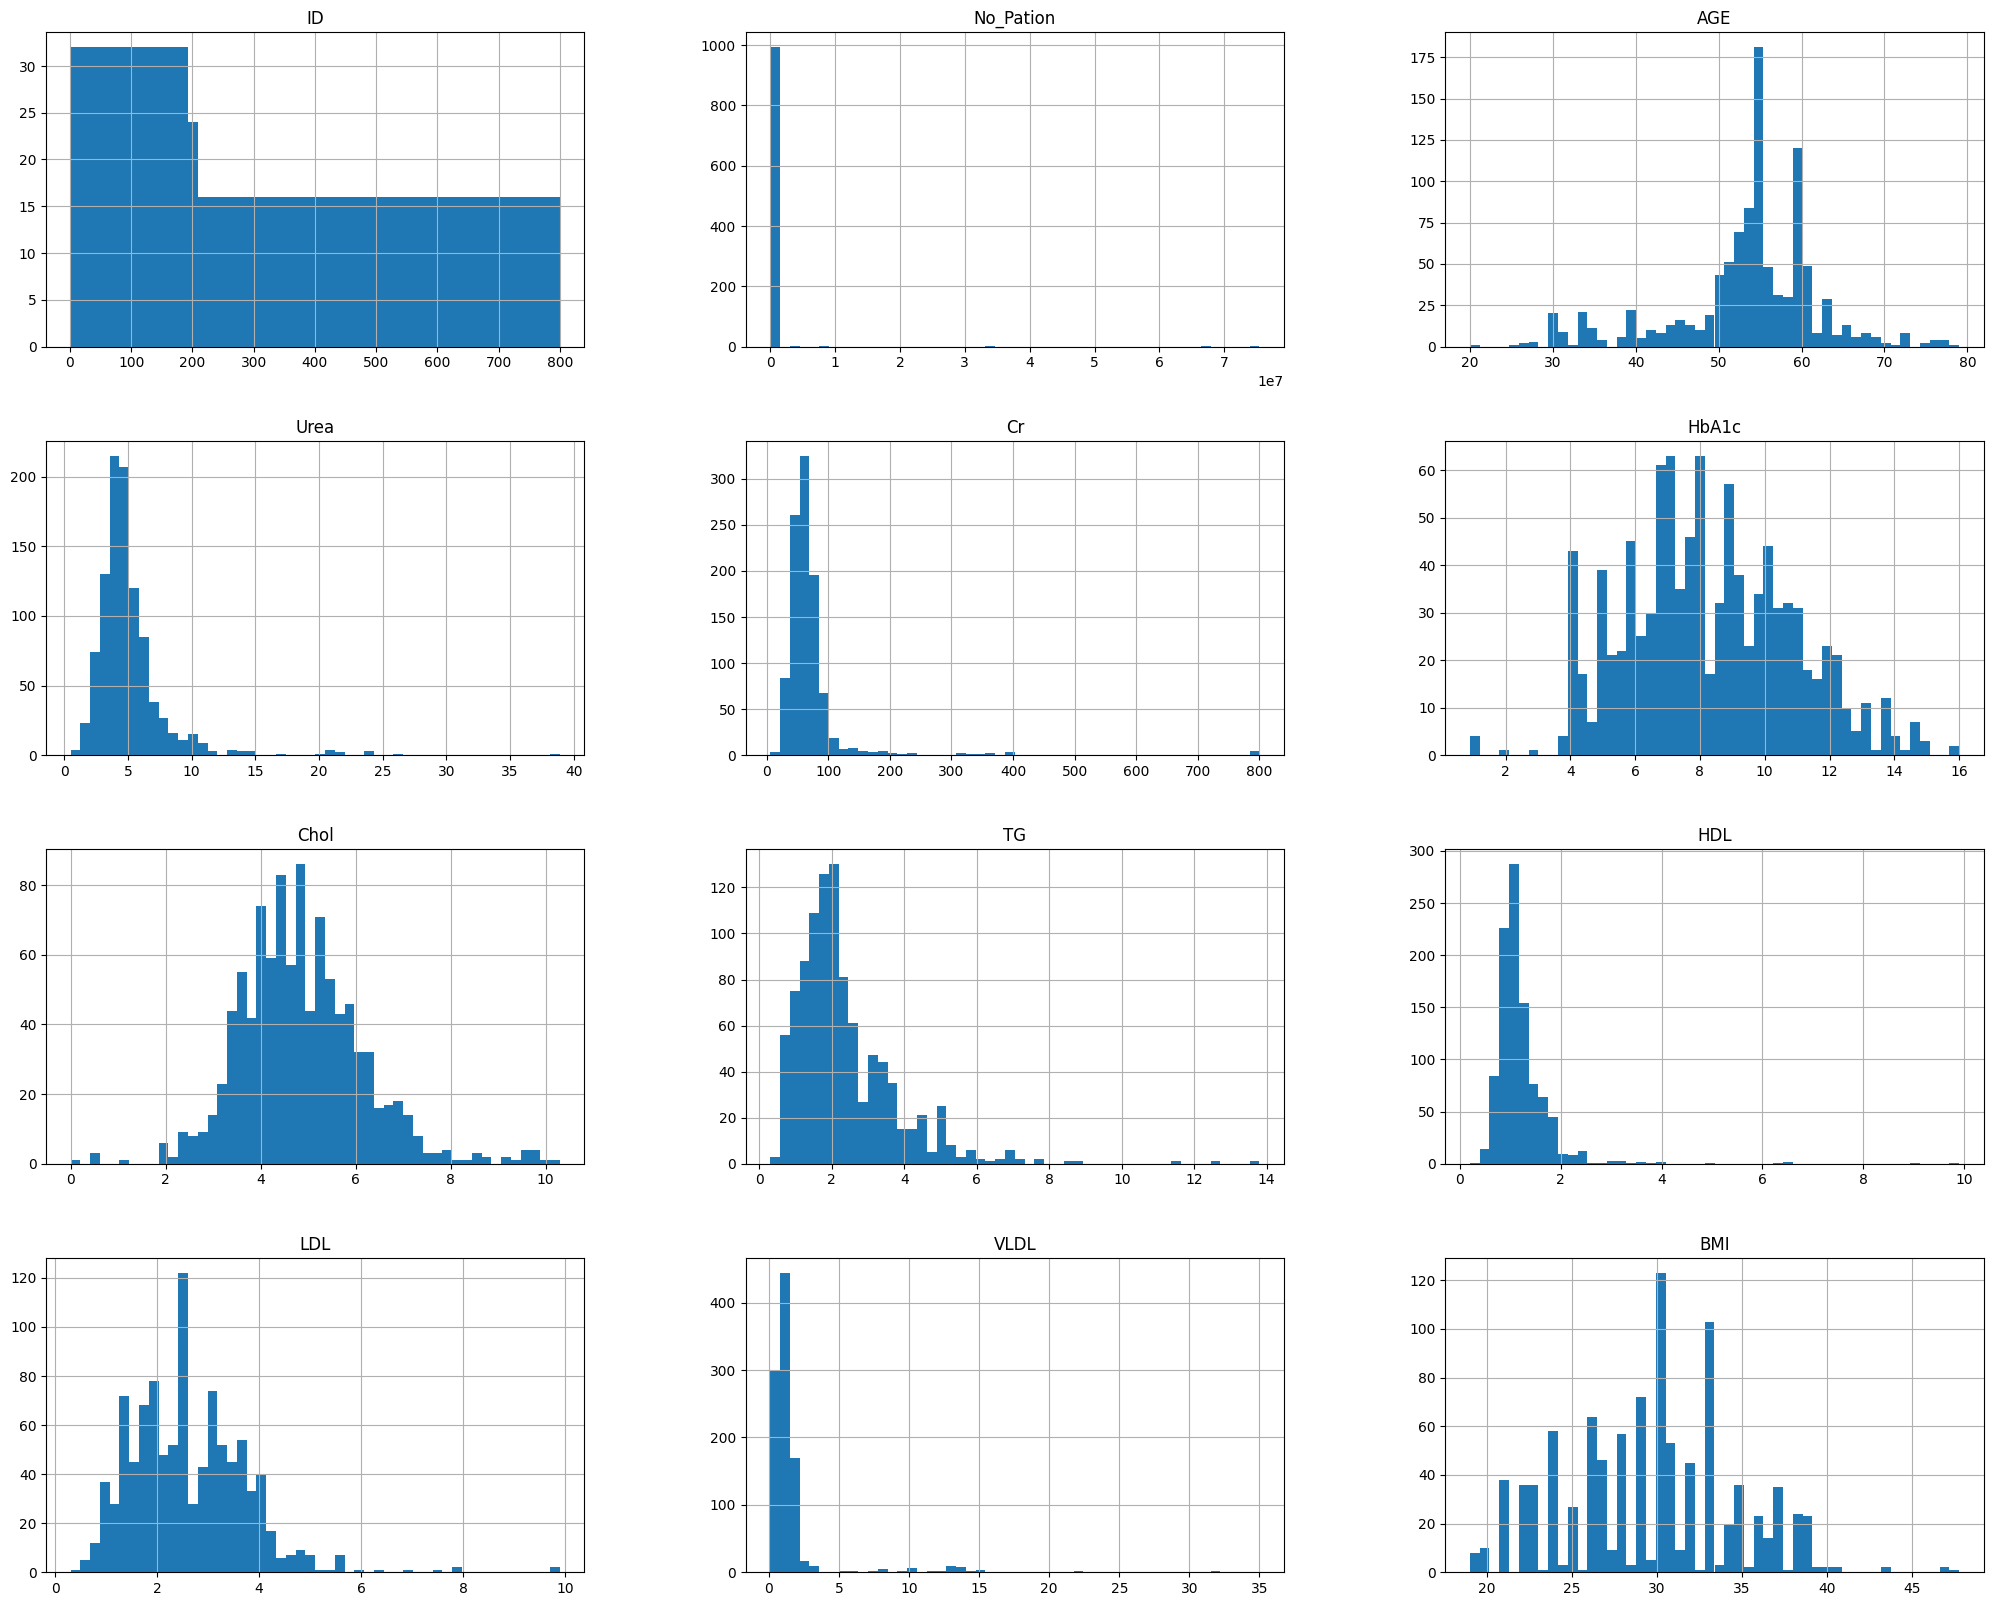

In [19]:
df.hist(bins=50, figsize=(25, 20))
plt.show()

In [20]:
df['CLASS'].value_counts()

Y     844
N     102
P      53
N       1
Name: CLASS, dtype: int64

In [22]:
#replace simillar values to unique values
df['CLASS'] = df['CLASS'].str.replace("N ", "N")
df['CLASS'] = df['CLASS'].str.replace("Y ", "Y")
df['Gender'] = df['Gender'].str.replace("f", "F")

In [23]:
#now check the unique value of gender
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [24]:
#now check the unique value of gender
df['CLASS'].unique()
df['CLASS'].value_counts()

Y    844
N    103
P     53
Name: CLASS, dtype: int64